In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Business context**

**Busines problem**

Import data

In [30]:
df = pd.read_excel('Muestra de datos_20200505.xlsx', sheet_name='Hoja1')

In [31]:
pd.set_option('display.max_columns', None)
display(df.dtypes)

CallID                         object
NumberOT                        int64
TaskNumber                      int64
Status                         object
SourceSystem                   object
ServiceType                    object
id                             object
Eng_Type                       object
RepairDate             datetime64[ns]
FinalRepairDate        datetime64[ns]
DuratioMin                      int64
TaskType                       object
CompletionDate         datetime64[ns]
OpenDate               datetime64[ns]
EarlyStart             datetime64[ns]
DueDate                datetime64[ns]
DispatchDate           datetime64[ns]
TravelDate             datetime64[ns]
OnSiteDate             datetime64[ns]
Subsidiary                     object
Region                         object
District                       object
TreeServiceGroup               object
ServiceGroup                   object
ServiceLine                    object
BusinessLine                   object
town        

In [32]:
df.head()

,CallID,NumberOT,TaskNumber,Status,SourceSystem,ServiceType,id,Eng_Type,RepairDate,FinalRepairDate,DuratioMin,TaskType,CompletionDate,OpenDate,EarlyStart,DueDate,DispatchDate,TravelDate,OnSiteDate,Subsidiary,Region,District,TreeServiceGroup,ServiceGroup,ServiceLine,BusinessLine,town,Latitude,Longitude,Priority,IncompleteReason,CrewGeneralComments,RepairCode,W6Key,IdEPM,Empresa
0,M_EPM_EN_4050431,3362408,1,No Realizada,MAR,Daños Energía,E_D0035,CU-TyD-Camioneta_MttoDaños_X3,NaT,NaT,30,TRABAJOFUSIBLE,2020-04-01 00:48:47,2020-03-31 23:21:02,2020-03-31 23:21:00,2020-04-01 07:20:00,2020-03-31 23:23:00,2020-04-01 00:44:04,NaT,EPM,Occidente,Santa Fe de Antioquia TyD,SA_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,Medellín,6439635,-75726734,1,TyD_623_Informacion errada o incompleta,Se deja pendiente por falta de información.......,NaN,1579106308,1682252,EPM
1,M_EPM_EN_4050411,3362402,1,No Realizada,MAR,Daños Energía,E_D0028,CU-TyD-Camioneta_MttoDaños_X3,NaT,NaT,40,TRABACOMSECUN,2020-04-01 00:52:08,2020-03-31 22:22:26,2020-03-31 22:22:00,2020-04-02 22:22:00,2020-04-01 00:45:00,2020-04-01 00:48:59,NaT,EPM,Metropolitana,Sur TyD,MS_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,Medellín,6193141,-75559273,3,TyD_626_Cancelado por el despacho,Se cancela por orden del despacho,NaN,1579089926,1682250,EPM
2,M_EPM_EN_4050417,3362407,2,Realizada,MAR,Daños Energía,E_D0622,CU-TyD-Moto_MttoDaños_X1,2020-04-01 00:10:00,2020-04-01 00:50:00,30,INSPECSEGURIDAD,2020-04-01 00:54:55,2020-03-31 23:07:11,2020-03-31 23:07:00,2020-04-01 07:07:00,2020-03-31 23:14:00,2020-03-31 23:18:25,2020-04-01 00:01:48,EPM,Suroeste,Tamesis TyD,TM_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,La pintada,5747122,-75606257,1,NaN,Se encontraron cuatro postes secundario de con...,CAMBIAR/ASEGURAR POSTE SECUNDARIO,1579106306,1682351,EPM
3,M_EPM_EN_4050417,3362407,2,Realizada,MAR,Daños Energía,E_D0622,CU-TyD-Moto_MttoDaños_X1,2020-04-01 00:10:00,2020-04-01 00:50:00,30,INSPECSEGURIDAD,2020-04-01 00:54:55,2020-03-31 23:07:11,2020-03-31 23:07:00,2020-04-01 07:07:00,2020-03-31 23:14:00,2020-03-31 23:18:25,2020-04-01 00:01:48,EPM,Suroeste,Tamesis TyD,TM_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,La pintada,5747122,-75606257,1,NaN,Se encontraron cuatro postes secundario de con...,CAMBIAR/ASEGURAR RED SECUNDARIA,1579106306,1682351,EPM
4,M_EPM_EN_4050417,3362407,2,Realizada,MAR,Daños Energía,E_D0622,CU-TyD-Moto_MttoDaños_X1,2020-04-01 00:10:00,2020-04-01 00:50:00,30,INSPECSEGURIDAD,2020-04-01 00:54:55,2020-03-31 23:07:11,2020-03-31 23:07:00,2020-04-01 07:07:00,2020-03-31 23:14:00,2020-03-31 23:18:25,2020-04-01 00:01:48,EPM,Suroeste,Tamesis TyD,TM_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,La pintada,5747122,-75606257,1,NaN,Se encontraron cuatro postes secundario de con...,ASEGUARAR/REUBICAR ACOMETIDAS DOMICILIARIAS,1579106306,1682351,EPM


In [38]:
display(df.CallID.value_counts().reset_index().CallID.value_counts())
len(df.CallID.unique())

1     458
2      91
3      44
4      11
6       9
5       8
7       4
9       2
8       2
14      1
13      1
Name: CallID, dtype: int64

631

¿Qué es cada observación?

No hay llave primaria

Varias filas hacen referencia a una misma intervención, pero en la cual se hicieron varios trabajos, uno por fila.

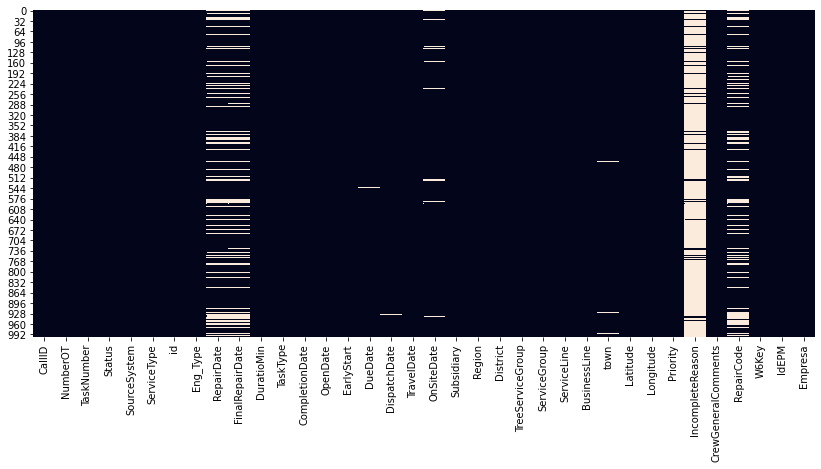

In [10]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)

In [11]:
print('--- Service type ---')
display(df.ServiceType.value_counts())

print('--- Status ---')
display(df.Status.value_counts())

print('--- Eng. type ---')
display(df.Eng_Type.value_counts())

print('--- Region (Of Antioquia department) ---')
display(df.Region.value_counts())

print('--- Town (Of Antioquia department) ---')
display(df.town.value_counts())

print('--- Priority ---')
display(df.Priority.value_counts())

print('--- SourceSystem (What is it?) ---')
display(df.SourceSystem.value_counts())

print('--- TaskNumber (What is it?) ---')
display(df.TaskNumber.value_counts())

print('--- Empresa ---')
display(df.Empresa.value_counts())


--- Service type ---


Daños Energía                        782
Mantenimiento Energía                168
Mto. Ener. Actividades Forestales     39
Mantenimiento Línea Viva               7
Mantenimiento Subterránea              3
Name: ServiceType, dtype: int64

--- Status ---


Realizada       911
No Realizada     88
Name: Status, dtype: int64

--- Eng. type ---


CU-TyD-Moto_MttoDaños_X1                 698
CU-TyD-Camioneta_MttoDaños_X3             72
CU-TyD-Camioneta_MttoDaños Prepago_x2     45
CU-TyD-Moto_MttoDaños_X2                  27
CU-TyD-Camioneta_Mtto_EquiEsp_Calidad     22
CU-TyD-Moto_Poda_X2                       21
CU-TyD-Camioneta_Poda_X4                  15
CU-TyD-Moto_MttoDaños Prepago_X1          14
CU-PER-CONTROL VEHÍCULO                   13
CU-TyD-Camioneta_MttoDaños_x1             12
CU-TyD-Camioneta_Mtto_X3                  11
CU-TyD-Equipo Grua                        10
CU-TyD-Canasta Tipo II                    10
CU-TyD-Moto_Calidad_Geo                   10
CU-TyD-Chipper_Poda                        9
CU-TyD-Camion_Mtto_X4                      5
CU-TyD-Camioneta_SubterraneaX4             4
CU-TyD-Camioneta_MttoDaños_x2              1
Name: Eng_Type, dtype: int64

--- Region (Of Antioquia department) ---


Metropolitana    227
Uraba            184
Oriente          145
Bajo Cauca       115
Nordeste         110
Suroeste          81
Norte             73
Occidente         64
Name: Region, dtype: int64

--- Town (Of Antioquia department) ---


Medellín                  136
Turbo                      48
El Bagre                   42
Apartadó                   35
Bello                      25
                         ... 
Granada                     1
Uramita                     1
Valparaíso                  1
El carmen de atrato         1
San Andrés De Cuerquía      1
Name: town, Length: 124, dtype: int64

--- Priority ---


1    379
4    278
7    100
9     96
3     78
2     50
5     18
Name: Priority, dtype: int64

--- SourceSystem (What is it?) ---


MAR    869
EAM    130
Name: SourceSystem, dtype: int64

--- TaskNumber (What is it?) ---


1     736
2     136
3      51
4      35
5      19
7       8
6       5
17      2
27      1
26      1
16      1
15      1
14      1
13      1
11      1
Name: TaskNumber, dtype: int64

--- Empresa ---


EPM          831
INGEOMEGA    105
Enecon        34
PRECOODES     21
ROR            8
Name: Empresa, dtype: int64

In [12]:
print('--- TaskType ---')
display(df.TaskType.value_counts())

print('--- Reason of no actions---')
display(df.IncompleteReason.value_counts())

print('--- Repair Code ---')
display(df.RepairCode.value_counts())

print('--- Crew General comments ---')
#display(df.CrewGeneralComments.unique())
#This have different case


--- TaskType ---


TRABAJOFUSIBLE          319
ATEMEDATC               176
EVENTOPROGRAM            98
TRABACOMSECUN            68
INSPECSEGURIDAD          63
INSPECQOS                57
TRABPUENTECONEX          50
INSPRECORRIDORA          17
OPEMNBNOPROG             16
PODARED02PLANES          16
PODARED01                12
PODARED                  11
MTTOPTRA                 10
REPOFUSRA                10
PODAMANRESVEG            10
MTTORECONEAEREA          10
ATEMEDATCPRE              9
MTTOELEMREDAEREA          8
TRABAJOPOSTE              7
REPCABRASECUN             5
INSRETPOSTERA             3
PODARESPVEGETALESLV       3
TRBREDSUBT                3
MTTOREGULADOR             2
TRABSECCIOLV              2
MTTOSENSOR                2
VERESTOPERRED             2
MTTOPOSTERA               2
TRABAJOVIENTOS            2
INSRETCABRASECUN          1
INSTARETIREQUISECCLV      1
PODAAP01                  1
RETIROBJRED               1
AISLADA                   1
TRASVESPOSTELV            1
Name: TaskType, dtyp

--- Reason of no actions---


TyD_626_Cancelado por el despacho                         27
TyD_594_Fuerza Mayor                                      16
TyD_624_Servicio Normal                                   12
TyD_595_Requiere otro tipo de cuadrilla                    9
TyD_406_Problemas de orden público                         6
TyD_607_Pedido duplicado para el mismo producto            5
TyD_619_Actividad para otras dependencias                  3
TyD_598_Vía cerrada                                        2
TyD_596_Sin acceso a la instalación                        2
TyD_623_Informacion errada o incompleta                    2
TyD_612_Localizado en área con restricción ambiental       1
TyD_622_Por recursos                                       1
TyD_600_El cliente o solicitante pide anular solicitud     1
TyD_625_Falta Material                                     1
Name: IncompleteReason, dtype: int64

--- Repair Code ---


CAMBIAR O INSTALAR FUSIBLE AISLADERO RAMAL - Ramales     86
CAMBIAR FUSIBLE A TRANSFORMADOR - Transformador          65
REVISIÓN POR CALIDAD DEL SERVICIO                        50
SOLICITUD DE PIN PARA DESBLOQUEO MEDIDOR PREPAGO         39
ASEGURAR/REPARAR ACOMETIDAS DOMICILIARIAS                36
                                                         ..
LLAMADA FALSA Y/O DIRECCION MALA                          1
zz NO USAR- CAMBIO MEDIDOR PREPAGO (Solo medidor)         1
zz NO USAR- CAMBIO TECLADO MEDIDOR PREPAGO                1
CAMBIAR O INSTALAR PARARRAYO PRIMARIO -Transformador      1
REPARAR CABLES AISLADOS PARA 44 KV                        1
Name: RepairCode, Length: 83, dtype: int64

--- Crew General comments ---


In [13]:
display(pd.crosstab(df.Status,df.IncompleteReason.isnull()))
display(pd.crosstab(df.Status,df.RepairCode.isnull()))

IncompleteReason,False,True
Status,,
No Realizada,88,0
Realizada,0,911


RepairCode,False,True
Status,,
No Realizada,11,77
Realizada,777,134


In [14]:
#Status "No Realizada" pero con código de reparación
df[(df.Status=='No Realizada') & (df.RepairCode.isnull()==False)]

,CallID,NumberOT,TaskNumber,Status,SourceSystem,ServiceType,id,Eng_Type,RepairDate,FinalRepairDate,DuratioMin,TaskType,CompletionDate,OpenDate,EarlyStart,DueDate,DispatchDate,TravelDate,OnSiteDate,Subsidiary,Region,District,TreeServiceGroup,ServiceGroup,ServiceLine,BusinessLine,town,Latitude,Longitude,Priority,IncompleteReason,CrewGeneralComments,RepairCode,W6Key,IdEPM,Empresa
130,M_EPM_EN_4049729,3362336,2,No Realizada,MAR,Daños Energía,E_P010,CU-PER-CONTROL VEHÍCULO,2020-04-01 08:13:00,2020-04-01 08:58:00,45,ATEMEDATC,2020-04-01 09:02:00,2020-03-31 18:42:21,2020-03-31 18:42:00,2020-04-02 18:41:00,2020-04-01 06:44:00,2020-04-01 07:54:12,2020-04-01 08:13:55,EPM,Metropolitana,Sur TyD,MS_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,Medellín,6241743,-75538592,4,TyD_595_Requiere otro tipo de cuadrilla,MED EN POSTE EN SISTEMA INTEGRAL SE REVISO SEÑ...,ENERGIZAR O DESENERGIZAR TRANSFORMADOR,1579016209,1682085,INGEOMEGA
183,M_EPM_EN_4050719,3362588,1,No Realizada,MAR,Daños Energía,E_D0503,CU-TyD-Moto_MttoDaños_X1,2020-04-01 09:07:00,2020-04-01 09:36:00,40,TRABACOMSECUN,2020-04-01 09:44:15,2020-04-01 07:40:38,2020-04-01 07:40:00,2020-04-03 07:34:00,2020-04-01 07:46:00,2020-04-01 07:48:21,2020-04-01 09:06:29,EPM,Metropolitana,Norte TyD,MN_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,Girardota,6385434,-75476289,3,TyD_595_Requiere otro tipo de cuadrilla,"Trafo 20286 sin servicio de energía, debido a ...",QUEDA PENDIENTE LA REPARACION POR FALTA DE HER...,1579204642,1682788,EPM
184,M_EPM_EN_4050719,3362588,1,No Realizada,MAR,Daños Energía,E_D0503,CU-TyD-Moto_MttoDaños_X1,2020-04-01 09:07:00,2020-04-01 09:36:00,40,TRABACOMSECUN,2020-04-01 09:44:15,2020-04-01 07:40:38,2020-04-01 07:40:00,2020-04-03 07:34:00,2020-04-01 07:46:00,2020-04-01 07:48:21,2020-04-01 09:06:29,EPM,Metropolitana,Norte TyD,MN_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,Girardota,6385434,-75476289,3,TyD_595_Requiere otro tipo de cuadrilla,"Trafo 20286 sin servicio de energía, debido a ...",CAMBIAR FUSIBLE A TRANSFORMADOR - Transformador,1579204642,1682788,EPM
190,M_EPM_EN_4049936,3362028,1,No Realizada,MAR,Daños Energía,E_D0311,CU-TyD-Moto_MttoDaños_X1,2020-03-31 15:39:00,2020-03-31 15:45:00,45,ATEMEDATC,2020-04-01 09:46:54,2020-03-31 11:25:06,2020-03-31 11:25:00,2020-04-02 11:24:00,2020-04-01 07:12:00,2020-04-01 09:15:14,NaT,EPM,Bajo Cauca,El Bagre TyD,EB_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,El Bagre,7586428,-74797047,4,TyD_624_Servicio Normal,Se visito el usuario y se encontró el servicio...,REVISIÓN POR CALIDAD DEL SERVICIO,1578827785,1681879,EPM
265,M_EPM_EN_4050301,3362331,1,No Realizada,MAR,Daños Energía,E_D0251,CU-TyD-Moto_MttoDaños_X1,2020-04-01 10:32:00,2020-04-01 10:47:00,30,TRABAJOFUSIBLE,2020-04-01 10:51:45,2020-03-31 18:31:00,2020-03-31 18:31:00,2020-04-01 02:31:00,2020-04-01 07:05:00,2020-04-01 08:06:59,2020-04-01 10:29:49,EPM,Uraba,Turbo TyD,TU_TyD Atención Clientes,TyD Atención Clientes,TyD,Daños TyD,San pedro de urabá,8232972,-76357389,1,TyD_622_Por recursos,Se llegó a la vereda y se encontró que el baja...,REPARAR BARRA PRIMARIA A TRANSFORMADOR - Trans...,1579008021,1682305,EPM
417,M_EPM_EN_4049708,3362235,3,No Realizada,MAR,Mantenimiento Energía,E_M0528,CU-TyD-Camioneta_Mtto_X3,2020-04-01 12:03:00,2020-04-01 12:04:00,600,EVENTOPROGRAM,2020-04-01 12:14:38,2020-03-31 16:20:00,2020-04-01 07:00:00,2020-04-01 17:00:00,2020-03-31 16:22:00,2020-04-01 11:58:01,2020-04-01 11:59:56,EPM,Occidente,Santa Fe de Antioquia TyD,SA_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Sopetrán,6553928,-75730838,9,TyD_619_Actividad para otras dependencias,En el circuito 603-13 de sopetran sector el Po...,CAMBIAR/ASEGURAR POSTE SECUNDARIO,1578942507,1680703,Enecon
567,M_EPM_EN_4050928,3362749,1,No Realizada,MAR,Daños Energía,E_D0157,CU-TyD-Moto_MttoDaños_X1,2020-04-01 13:04:00,2020-04-01 13:27:00,30,INSPECSEGURIDAD,2020-04-01 13:32:53,2020-04-01 10:02:29,2020-04-01 10:02:00,2020-04-02 10:02:00,2020-04-01 10:0

Los casos en que el status es "No Realizada" y hay dato de código de reparación debe ser que llegaron al lugar pero quedó trabajo por hacer o no se tuvo que hacer nada.

In [15]:
#Status "Realizada" pero no tiene código de reparación
df[(df.Status=='Realizada') & (df.RepairCode.isnull()==True)].head(20)

,CallID,NumberOT,TaskNumber,Status,SourceSystem,ServiceType,id,Eng_Type,RepairDate,FinalRepairDate,DuratioMin,TaskType,CompletionDate,OpenDate,EarlyStart,DueDate,DispatchDate,TravelDate,OnSiteDate,Subsidiary,Region,District,TreeServiceGroup,ServiceGroup,ServiceLine,BusinessLine,town,Latitude,Longitude,Priority,IncompleteReason,CrewGeneralComments,RepairCode,W6Key,IdEPM,Empresa
21,MX_EPM_0133_DE_2666243,2666243,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP062,CU-TyD-Camioneta_Poda_X4,NaT,NaT,120,PODARED02PLANES,2020-04-01 06:06:38,2020-03-27 13:28:00,2020-03-30 08:00:00,2020-03-30 10:00:00,2020-03-31 15:51:00,2020-04-01 06:02:22,2020-04-01 06:02:39,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Itagüí,6171549,-75629274,7,NaN,Está dirección ya se trabajo,NaN,1576763397,1675989,Enecon
22,MX_EPM_0133_DE_2666571,2666571,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP068,CU-TyD-Camioneta_Poda_X4,NaT,NaT,510,PODARED02PLANES,2020-04-01 06:10:01,2020-03-27 15:12:00,2020-03-27 15:00:00,2020-04-03 17:00:00,2020-03-31 15:46:00,2020-04-01 06:06:39,2020-04-01 06:06:43,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Caldas,6093905,-75632139,7,NaN,El circuito ya se termino,NaN,1576796191,1677329,Enecon
23,MX_EPM_0133_DE_2666682,2666682,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP064,CU-TyD-Moto_Poda_X2,NaT,NaT,540,PODARED01,2020-04-01 06:12:19,2020-03-27 15:22:00,2020-03-27 15:15:00,2020-04-03 17:00:00,2020-03-31 15:48:00,2020-04-01 06:03:54,2020-04-01 06:11:09,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Caldas,6093905,-75632139,7,NaN,Se candela.la ot porque ya se terminó el circuito,NaN,1576812575,1665087,Enecon
25,MX_EPM_0133_DE_2089915,2089915,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP060,CU-TyD-Camioneta_Poda_X4,NaT,NaT,510,PODARED02PLANES,2020-04-01 06:27:54,2019-12-19 05:10:00,2019-12-19 12:00:00,2019-12-23 12:00:00,2020-03-31 15:51:00,2020-04-01 06:19:38,2020-04-01 06:21:16,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,La estrella,6148625,-75635569,7,NaN,Se cancela ot,NaN,1521844245,1441098,Enecon
26,MX_EPM_0133_DE_2666250,2666250,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP067,CU-TyD-Chipper_Poda,NaT,NaT,180,PODAMANRESVEG,2020-04-01 06:27:58,2020-03-27 13:29:00,2020-03-27 13:15:00,2020-04-03 17:00:00,2020-03-31 15:48:00,2020-04-01 06:24:21,2020-04-01 06:24:28,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Itagüí,6171549,-75629274,7,NaN,Se realizó recolección de residuos de poda sin...,NaN,1576747075,1679971,Enecon
27,MX_EPM_0133_DE_2666560,2666560,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP065,CU-TyD-Moto_Poda_X2,NaT,NaT,510,PODARED02PLANES,2020-04-01 06:31:58,2020-03-27 15:01:00,2020-03-27 14:45:00,2020-04-03 17:00:00,2020-04-01 06:18:00,2020-04-01 06:24:46,2020-04-01 06:25:15,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Caldas,6093905,-75632139,7,NaN,Se cancela este evento ya fue atendido,NaN,1576796187,1672189,Enecon
28,MX_EPM_0133_DE_2602923,2602923,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP066,CU-TyD-Chipper_Poda,NaT,NaT,180,PODAMANRESVEG,2020-04-01 07:07:43,2020-03-17 16:06:00,2020-03-18 08:00:00,2020-03-18 10:00:00,2020-03-31 15:51:00,2020-04-01 07:00:24,2020-04-01 07:01:51,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Mantenimiento TyD,Medellín,6210158,-75567259,7,NaN,Serrado porque ya se había realizado la recole...,NaN,1570914306,1653800,Enecon
31,MX_EPM_0133_DE_2602941,2602941,1,Realizada,EAM,Mto. Ener. Actividades Forestales,E_MP066,CU-TyD-Chipper_Poda,NaT,NaT,180,PODAMANRESVEG,2020-04-01 07:12:01,2020-03-17 16:10:00,2020-03-18 10:00:00,2020-03-18 12:00:00,2020-03-31 16:07:00,2020-04-01 07:08:10,2020-04-01 07:08:16,EPM,Metropolitana,Sur TyD,MS_TyD Mantenimiento,TyD Mantenimiento,TyD,Manteni

Status "Realizada" pero no tiene código de reparación.
Se alcanzan a ver las siguientes situaciones: 
1. Se da como realizado pero queda pendiente trabajo.
2. Casos en que no hubo que realizar trabajo por normalidad en servicio o ya se había realizado el trabajo.
3. Se describe el trabajo realizado pero no se reporta el RepairCode correspondiente.

count    999.000000
mean      80.645646
std      115.962724
min       15.000000
25%       30.000000
50%       40.000000
75%       45.000000
max      600.000000
Name: DuratioMin, dtype: float64

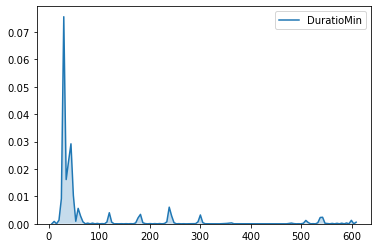

In [24]:
display(df.DuratioMin.describe())
sns.kdeplot(df.DuratioMin, shade=True)

In [17]:
df[['Latitude','Longitude']].head()

,Latitude,Longitude
0,6439635,-75726734
1,6193141,-75559273
2,5747122,-75606257
3,5747122,-75606257
4,5747122,-75606257


Problem with Latitude and Longitude

In [18]:
df.Latitude = df.Latitude/1000000
df.Longitude = df.Longitude/1000000

In [19]:
df[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,999.000000,999.000000
mean,6.801024,-75.568198
std,0.815313,0.635525
min,5.508110,-76.828942
25%,6.204797,-75.825851
50%,6.474649,-75.556850
75%,7.595431,-75.179209
max,8.852192,-73.903274


In [20]:
#Colors to plot by region
from random import randint

regions = df.Region.unique()
regions_colors = ['#%06X' % randint(0, 0xFFFFFF) for i in range(len(regions))]
regions_col_dict = dict(zip(regions,regions_colors))
regions_col_dict

{'Occidente': '#85CF63',
 'Metropolitana': '#377710',
 'Suroeste': '#780779',
 'Oriente': '#227FCF',
 'Uraba': '#0E7C7D',
 'Bajo Cauca': '#84080C',
 'Norte': '#7DE5ED',
 'Nordeste': '#53BCFC'}

In [21]:
#Center in Medellín: (6.2518401, -75.563591)
antioquia_map = folium.Map(location=[6.2518401, -75.563591],
                        zoom_start=9,
                        tiles="OpenStreetMap")

for i in range(0,len(df)):
    marker = folium.CircleMarker(location=[ df["Latitude"][i], df["Longitude"][i] ],
                                 radius=2,
                                 color=regions_col_dict[df.Region[i]] ,
                                 fill=True)
    marker.add_to(antioquia_map)


antioquia_map